# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+city+"&appid="+weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | kudahuvadhoo
Processing Record 5 of Set 1 | margaret river
Processing Record 6 of Set 1 | hamilton
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | hobyo
Processing Record 9 of Set 1 | tobi village
City not found. Skipping...
Processing Record 10 of Set 1 | san patricio
Processing Record 11 of Set 1 | hasaki
Processing Record 12 of Set 1 | nemuro
Processing Record 13 of Set 1 | lebu
Processing Record 14 of Set 1 | polyarnyy
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | chibougamau
Processing Record 17 of Set 1 | gadzhiyevo
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | i-n-salah
Processing Record 20 of Set 1 | longyearbyen
Processing Record 21 of Set 1 | laikit, lai

Processing Record 38 of Set 4 | paracale
Processing Record 39 of Set 4 | at taj
Processing Record 40 of Set 4 | nizhneangarsk
Processing Record 41 of Set 4 | carnarvon
Processing Record 42 of Set 4 | remire-montjoly
Processing Record 43 of Set 4 | cloverdale
Processing Record 44 of Set 4 | pisco
Processing Record 45 of Set 4 | arkhangel'sk
Processing Record 46 of Set 4 | swakopmund
Processing Record 47 of Set 4 | la leonesa
Processing Record 48 of Set 4 | mancio lima
Processing Record 49 of Set 4 | beyneu
Processing Record 0 of Set 5 | leh
Processing Record 1 of Set 5 | luza
Processing Record 2 of Set 5 | vilyuchinsk
Processing Record 3 of Set 5 | tenenkou
Processing Record 4 of Set 5 | sokoni
Processing Record 5 of Set 5 | la passe
Processing Record 6 of Set 5 | lhasa
Processing Record 7 of Set 5 | georgetown
Processing Record 8 of Set 5 | kristiansund
Processing Record 9 of Set 5 | nova sintra
Processing Record 10 of Set 5 | bikenibeu village
Processing Record 11 of Set 5 | flying fi

Processing Record 29 of Set 8 | vyaz'ma
Processing Record 30 of Set 8 | kilindoni
Processing Record 31 of Set 8 | guiratinga
Processing Record 32 of Set 8 | am djarass
City not found. Skipping...
Processing Record 33 of Set 8 | west helena
Processing Record 34 of Set 8 | puerto aysen
Processing Record 35 of Set 8 | port saint john's
Processing Record 36 of Set 8 | grand falls-windsor
Processing Record 37 of Set 8 | callao
Processing Record 38 of Set 8 | uchiza
Processing Record 39 of Set 8 | smach mean chey
City not found. Skipping...
Processing Record 40 of Set 8 | laayoune plage
City not found. Skipping...
Processing Record 41 of Set 8 | hun
Processing Record 42 of Set 8 | uturoa
Processing Record 43 of Set 8 | ahau
City not found. Skipping...
Processing Record 44 of Set 8 | trinidad
Processing Record 45 of Set 8 | howrah
Processing Record 46 of Set 8 | la foa
Processing Record 47 of Set 8 | fort mcmurray
Processing Record 48 of Set 8 | porto santo stefano
Processing Record 49 of Set

Processing Record 15 of Set 12 | ketchikan
Processing Record 16 of Set 12 | salida
Processing Record 17 of Set 12 | cowansville
Processing Record 18 of Set 12 | la'ie
Processing Record 19 of Set 12 | camalu
Processing Record 20 of Set 12 | varzea grande
Processing Record 21 of Set 12 | wainwright
Processing Record 22 of Set 12 | nagqu
Processing Record 23 of Set 12 | nishinoomote
Processing Record 24 of Set 12 | ardakan
Processing Record 25 of Set 12 | silifke
Processing Record 26 of Set 12 | isla mujeres
Processing Record 27 of Set 12 | portland
Processing Record 28 of Set 12 | tamanrasset
Processing Record 29 of Set 12 | tasqala
Processing Record 30 of Set 12 | bubaque
Processing Record 31 of Set 12 | vylkove
Processing Record 32 of Set 12 | palencia
Processing Record 33 of Set 12 | guazacapan
Processing Record 34 of Set 12 | ialibu
Processing Record 35 of Set 12 | peniche
Processing Record 36 of Set 12 | nalut
Processing Record 37 of Set 12 | kalengwa
Processing Record 38 of Set 12 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,271.19,88,97,1.86,GS,1689888945
1,edinburgh of the seven seas,-37.0676,-12.3116,284.85,58,38,10.96,SH,1689888950
2,adamstown,-25.0660,-130.1015,295.45,86,100,17.86,PN,1689888944
3,kudahuvadhoo,2.6708,72.8944,301.41,73,99,3.68,MV,1689889577
4,margaret river,-33.9500,115.0667,287.82,68,30,8.52,AU,1689889107


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../Resources/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../Resources/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,271.19,88,97,1.86,GS,1689888945
1,edinburgh of the seven seas,-37.0676,-12.3116,284.85,58,38,10.96,SH,1689888950
2,adamstown,-25.0660,-130.1015,295.45,86,100,17.86,PN,1689888944
3,kudahuvadhoo,2.6708,72.8944,301.41,73,99,3.68,MV,1689889577
4,margaret river,-33.9500,115.0667,287.82,68,30,8.52,AU,1689889107


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

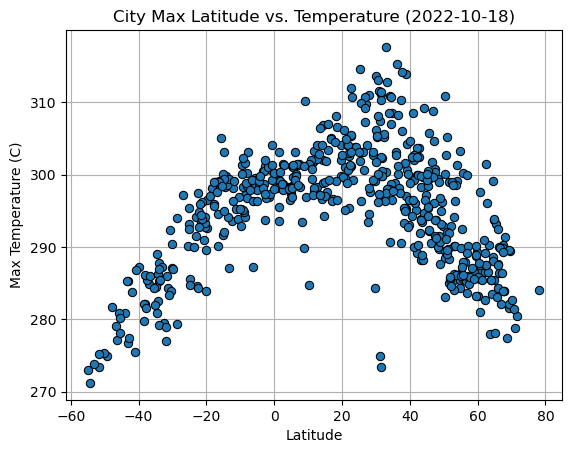

In [10]:
# Build scatter plot for latitude vs. temperature
plt.plot(city_data_df["Lat"], 
         city_data_df["Max Temp"],
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("../output_data/LvT.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

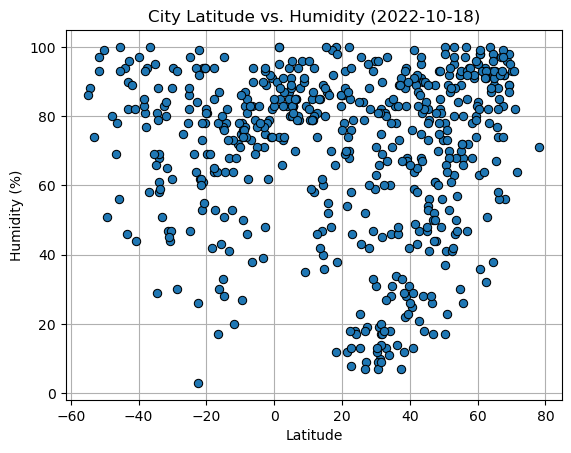

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.plot(city_data_df["Lat"], 
         city_data_df["Humidity"],
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("../output_data/LvH.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

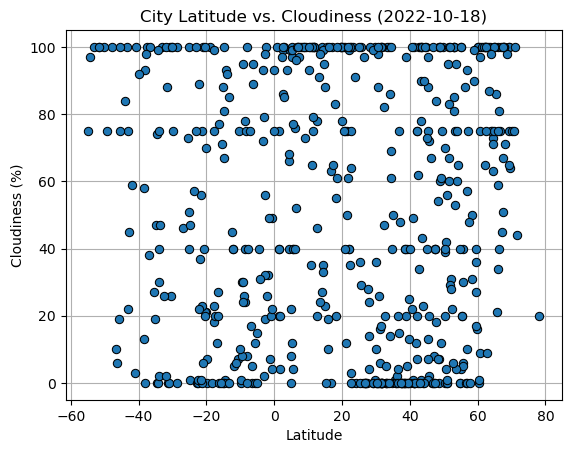

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.plot(city_data_df["Lat"], 
         city_data_df["Cloudiness"], 
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.grid()
# Save the figure
plt.savefig("../output_data/LvC.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

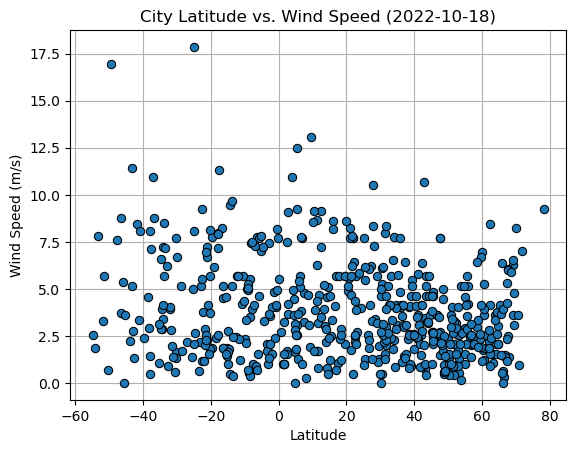

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.plot(city_data_df["Lat"], 
         city_data_df["Wind Speed"], 
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("../output_data/LvWS.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, x_c=.1, y_c=.9):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, xy=(x_c, y_c), xycoords='axes fraction', fontsize=15,color="red")
    plt.xlabel ("Latitude")
    plt.ylabel (y_values.name)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,kudahuvadhoo,2.6708,72.8944,301.41,73,99,3.68,MV,1689889577
5,hamilton,39.1834,-84.5333,304.21,68,40,4.63,US,1689889075
7,hobyo,5.3505,48.5268,298.42,83,97,12.47,SO,1689889105
8,san patricio,28.0170,-97.5169,311.02,42,4,7.29,US,1689888944
9,hasaki,35.7333,140.8333,298.88,83,1,4.81,JP,1689889069


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,271.19,88,97,1.86,GS,1689888945
1,edinburgh of the seven seas,-37.0676,-12.3116,284.85,58,38,10.96,SH,1689888950
2,adamstown,-25.0660,-130.1015,295.45,86,100,17.86,PN,1689888944
4,margaret river,-33.9500,115.0667,287.82,68,30,8.52,AU,1689889107
6,puerto ayora,-0.7393,-90.3518,304.13,91,49,4.02,EC,1689889098


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.3384104377774165


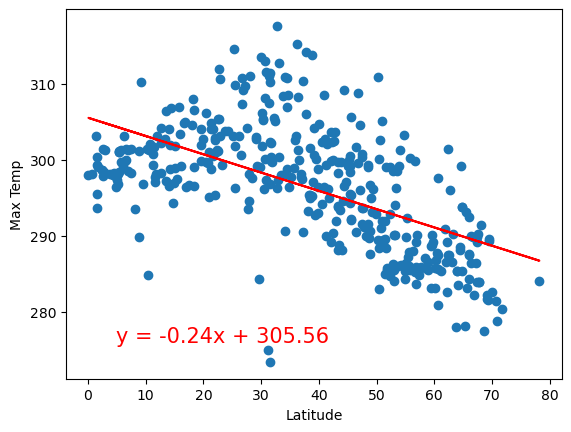

In [23]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
linear_regression(x_values,y_values,0.1,0.1)

The r-value is: 0.7842871675763587


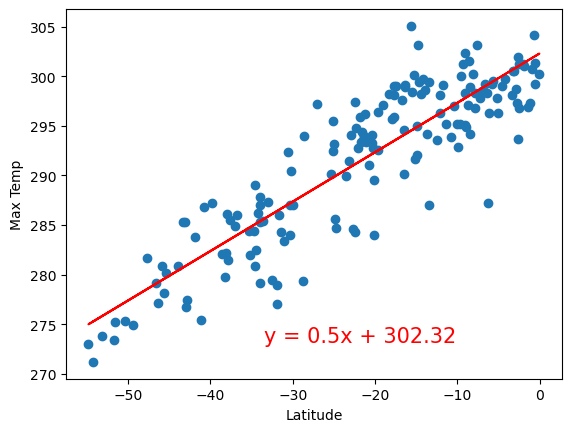

In [21]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
linear_regression(x_values,y_values,0.4,0.1)

**Discussion about the linear relationship: 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0035424948342194073


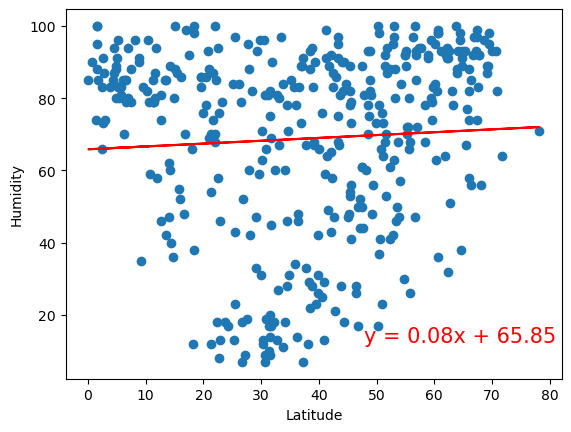

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linear_regression(x_values, y_values, 0.6, 0.1)

The r-value is: 0.011301132882802706


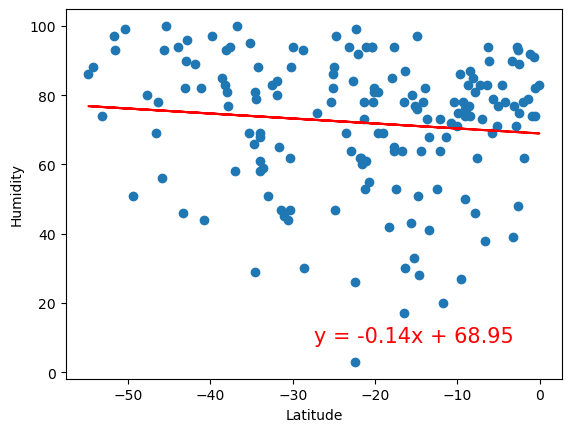

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linear_regression(x_values, y_values, 0.5, 0.1)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0008429654966540222


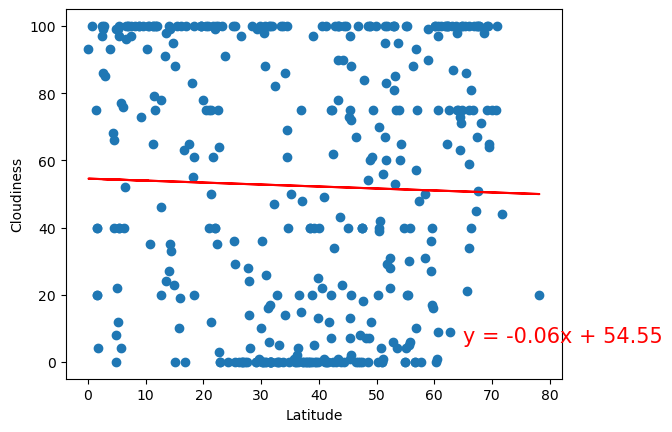

In [44]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linear_regression(x_values, y_values, 0.8, 0.1)

The r-value is: 0.0696322295329387


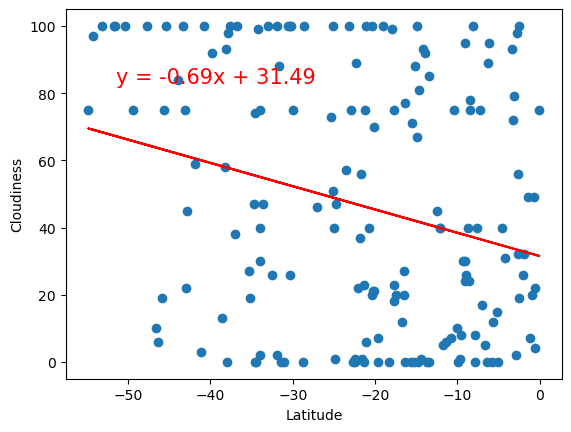

In [46]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

linear_regression(x_values, y_values, 0.1, 0.8)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.038475834319463144


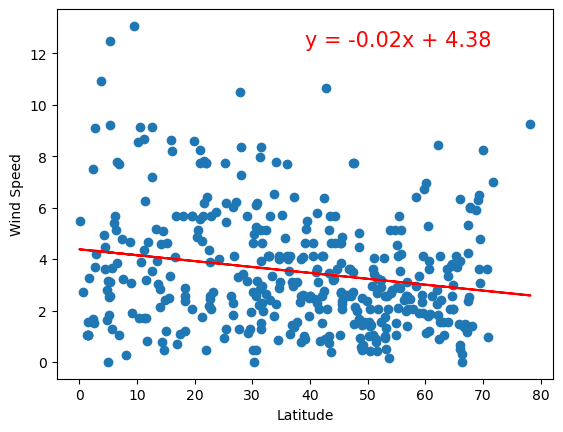

In [52]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linear_regression(x_values, y_values, 0.5, 0.9)

The r-value is: 0.012164539036533757


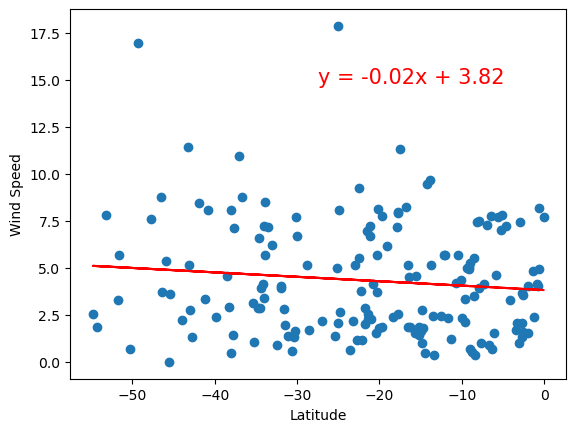

In [53]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

linear_regression(x_values, y_values, 0.5, 0.8)

**Discussion about the linear relationship:** YOUR RESPONSE HERE